# Data visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load file train.py as dataframe
df = pd.read_csv('./dataset/train_eegs.csv')

# Visualize dataset
display(df.head())

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,239732686,0,0.0,661359598,0,0.0,1718011736,29521,Other,0,0,0,0,0,1
1,951559425,1,10.0,334675329,1,10.0,2828547806,34554,LPD,0,8,1,0,0,6
2,2025500940,7,18.0,764146759,775,13802.0,3251057493,30631,LPD,0,5,0,5,0,1
3,581729291,8,22.0,1688733495,8,22.0,621540975,16541,LRDA,0,1,0,11,0,1
4,699093875,22,322.0,60873434,22,322.0,2533915430,35627,LPD,0,1,0,0,0,0


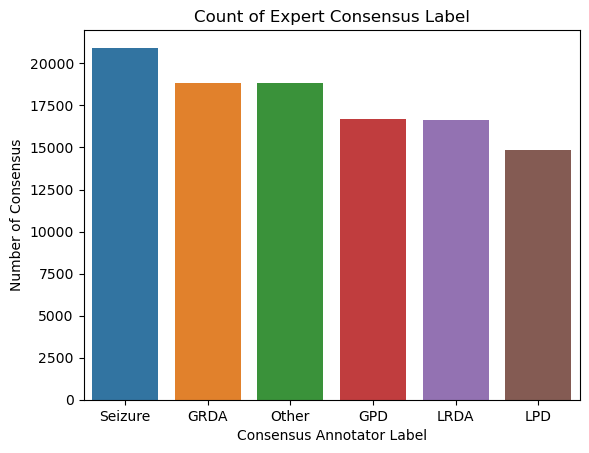

  Expert Consensus  Count  Percentage
0          Seizure  20933       19.60
1             GRDA  18861       17.66
2            Other  18808       17.61
3              GPD  16702       15.64
4             LRDA  16640       15.58
5              LPD  14856       13.91


In [54]:
# value count for `expert_consensus`
consensus_counts = df["expert_consensus"].value_counts()

# experts consensus barchart
sns.barplot(x=consensus_counts.index, y=consensus_counts)
plt.xlabel("Consensus Annotator Label")
plt.ylabel("Number of Consensus")
plt.title("Count of Expert Consensus Label")
plt.show()

# dataframe with label e count
consensus_df = consensus_counts.to_frame(name="Count").reset_index()
consensus_df.columns = ["Expert Consensus", "Count"]
consensus_df["Percentage"] = round((consensus_df["Count"] / consensus_df["Count"].sum()) * 100, 2)

print(consensus_df.to_string(index=True))

seizure_vote_percentage            lpd_vote_percentage  \
                                    mean        std                mean   
expert_consensus                                                          
GPD                             8.532258  13.139390            5.157950   
GRDA                            0.360999   2.778495            0.839372   
LPD                             2.848600   7.709076           76.257498   
LRDA                            1.236265   4.730126            4.307265   
Other                           1.351664   5.280281            4.197696   
Seizure                        94.932158  14.350596            1.220750   

                            gpd_vote_percentage             \
                        std                mean        std   
expert_consensus                                             
GPD               10.143786           73.330232  17.876808   
GRDA               3.765100            1.577633   5.592612   
LPD               22.280876            3.046203   9.288272   
LRDA               9.701405            0.595960   3.143241   
Other              9.673693            2.442813   7.367326   
Seizure            6.241186            0.817032   5.253254   

                 lrda_vote_percentage            grda_vote_percentage  \
                                 mean        std                 mean   
expert_consensus                                                        
GPD                          0.576352   3.168315             3.195042   
GRDA                         3.061316   8.657640            86.091540   
LPD                          6.530153  12.524307             0.940726   
LRDA                        73.177407  21.797746             6.385442   
Other                        4.719498   9.902025             6.010685   
Seizure                      0.610185   4.172626             0.212274   

                            other_vote_percentage             
                        std                  mean        std  
expert_consensus                                              
GPD                8.211168              9.208166  12.888168  
GRDA              20.027472              8.069140  14.020961  
LPD                4.346746             10.376819  14.039483  
LRDA              11.973563             14.297661  16.708855  
Other             11.226495             81.277643  19.284227  
Seizure            2.262233              2.207602   8.275896

<Figure size 1000x600 with 0 Axes>

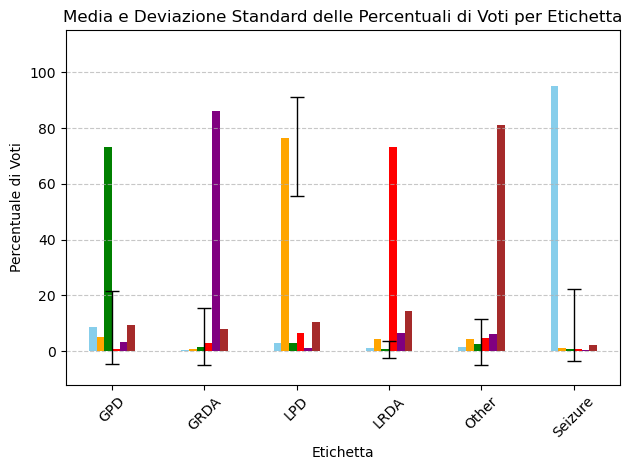

In [51]:
import pandas as pd

df = pd.read_csv('./hms-harmful-brain-activity-classification/dataset/dataset.csv')

# calcola la percentuale di voti per ciascuna etichetta rispetto al totale dei voti per ogni riga
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df['total_votes'] = df[vote_columns].sum(axis=1)
for col in vote_columns:
    df[col + '_percentage'] = df[col] / df['total_votes'] * 100

# calcola la media e la deviazione standard delle percentuali per ogni etichetta
mean_std_df = df.groupby('expert_consensus')[[col + '_percentage' for col in vote_columns]].agg(['mean', 'std'])

display(mean_std_df)

# estrai i valori numerici di medie e deviazioni standard
mean_values = mean_std_df[[(col + '_percentage', 'mean') for col in vote_columns]].values.flatten()
std_values = mean_std_df[[(col + '_percentage', 'std') for col in vote_columns]].values.flatten()

# plot
plt.figure(figsize=(10, 6))
mean_std_df.plot(kind='bar', y=[(col + '_percentage', 'mean') for col in vote_columns], color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown'], legend=False)
plt.errorbar(x=range(len(mean_values)), y=mean_values, yerr=std_values, fmt='none', ecolor='black', elinewidth=1, capsize=5)
plt.title('Media e Deviazione Standard delle Percentuali di Voti per Etichetta')
plt.xlabel('Etichetta')
plt.ylabel('Percentuale di Voti')
plt.xticks(range(len(mean_std_df)), mean_std_df.index, rotation=45)  # Utilizziamo len(mean_std_df) per ottenere il numero corretto di etichette
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

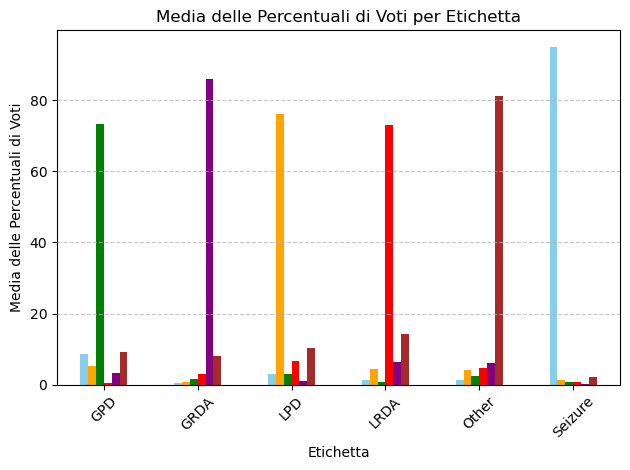

<Figure size 1000x600 with 0 Axes>

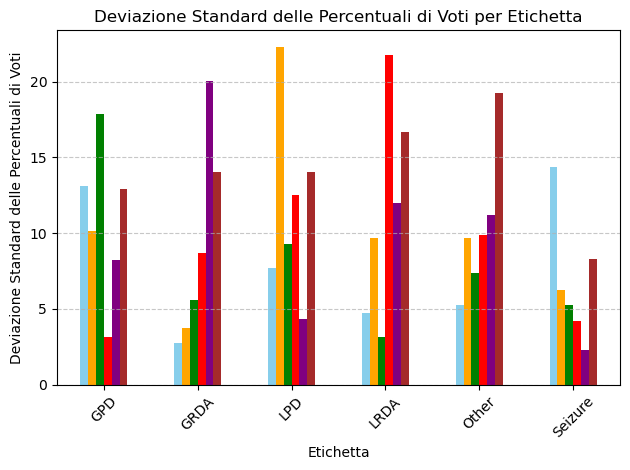

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# carica il dataset
df = pd.read_csv('./hms-harmful-brain-activity-classification/dataset/dataset.csv')

# calcola la percentuale di voti per ciascuna etichetta rispetto al totale dei voti per ogni riga
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df['total_votes'] = df[vote_columns].sum(axis=1)
for col in vote_columns:
    df[col + '_percentage'] = df[col] / df['total_votes'] * 100

# calcola la media e la deviazione standard delle percentuali per ogni etichetta
mean_std_df = df.groupby('expert_consensus')[[col + '_percentage' for col in vote_columns]].agg(['mean', 'std'])

# estrai i valori numerici di medie e deviazioni standard
mean_values = mean_std_df[[(col + '_percentage', 'mean') for col in vote_columns]].values.flatten()
std_values = mean_std_df[[(col + '_percentage', 'std') for col in vote_columns]].values.flatten()

# grafico per le medie
plt.figure(figsize=(10, 6))
mean_std_df.plot(kind='bar', y=[(col + '_percentage', 'mean') for col in vote_columns], color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown'], legend=False)
plt.title('Media delle Percentuali di Voti per Etichetta')
plt.xlabel('Etichetta')
plt.ylabel('Media delle Percentuali di Voti')
plt.xticks(range(len(mean_std_df)), mean_std_df.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# grafico per le deviazioni standard
plt.figure(figsize=(10, 6))
mean_std_df.plot(kind='bar', y=[(col + '_percentage', 'std') for col in vote_columns], color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown'], legend=False)
plt.title('Deviazione Standard delle Percentuali di Voti per Etichetta')
plt.xlabel('Etichetta')
plt.ylabel('Deviazione Standard delle Percentuali di Voti')
plt.xticks(range(len(mean_std_df)), mean_std_df.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

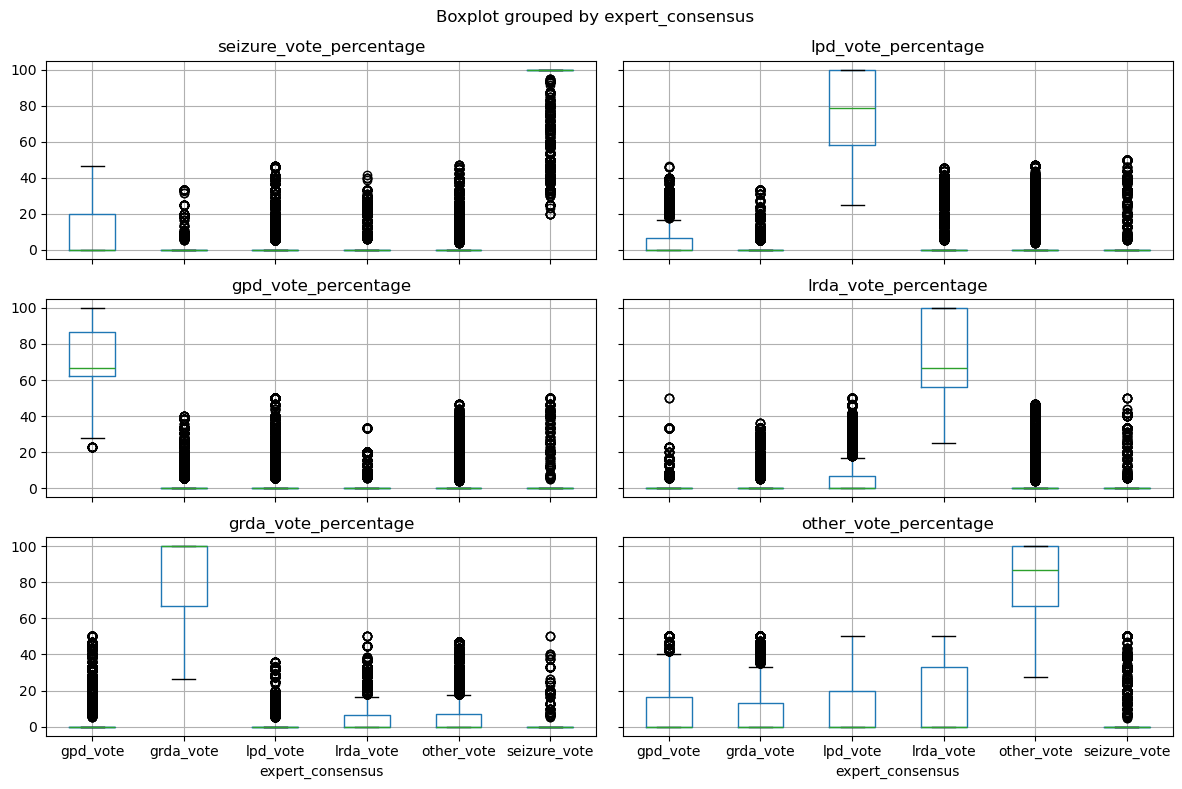

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv('./hms-harmful-brain-activity-classification/dataset/dataset.csv')

# Calcola la percentuale di voti per ciascuna etichetta rispetto al totale dei voti per ogni riga
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df['total_votes'] = df[vote_columns].sum(axis=1)
for col in vote_columns:
    df[col + '_percentage'] = df[col] / df['total_votes'] * 100

# Crea il boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column=[col + '_percentage' for col in vote_columns], by='expert_consensus', figsize=(12, 8))
# plt.title('Boxplot delle Percentuali di Voti per Etichetta')
# plt.xlabel('Etichetta')
# plt.ylabel('Percentuale di Voti')
# plt.xticks(rotation=45)

# Aggiungi i nomi delle etichette sotto il boxplot
plt.xticks(ticks=range(1, len(vote_columns) + 1), labels=sorted(vote_columns))
plt.tight_layout()
plt.show()


# Visualize spectrograms

In [5]:
import pandas as pd

# Carica il file .parquet
df = pd.read_parquet('./dataset/train_spectrograms/353733.parquet')


# Visualizza le prime righe del dataframe
print("Prime 5 righe del dataframe:")
display(df.head())

# Informazioni sul dataframe
print("\nInformazioni sul dataframe:")
print(df.info())

# Statistiche descrittive del dataframe
print("\nStatistiche descrittive:")
display(df.describe())

Prime 5 righe del dataframe:


,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34



Informazioni sul dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 401 entries, time to RP_19.92
dtypes: float32(400), int64(1)
memory usage: 502.6 KB
None

Statistiche descrittive:


,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,320.000000,4.354875,6.255469,8.247343,9.557375,10.627500,12.026468,13.306719,14.755376,16.029657,...,0.343406,0.310188,0.311281,0.315000,0.299531,0.299188,0.305031,0.302875,0.304563,0.303844
std,185.040536,2.296027,2.952741,3.428192,3.912668,4.230537,4.952774,5.225338,5.302315,5.486033,...,0.582866,0.474795,0.495116,0.539351,0.454934,0.443428,0.455136,0.453245,0.480294,0.497602
min,1.000000,1.180000,1.670000,2.570000,2.370000,1.980000,1.890000,3.500000,3.930000,4.550000,...,0.040000,0.040000,0.040000,0.040000,0.030000,0.040000,0.040000,0.030000,0.040000,0.030000
25%,160.500000,2.857500,4.207500,5.745000,6.727500,7.652500,8.572500,9.467500,10.927500,12.127500,...,0.130000,0.130000,0.130000,0.120000,0.120000,0.130000,0.137500,0.130000,0.130000,0.120000
50%,320.000000,3.895000,5.565000,7.690000,8.870000,10.080000,11.260000,12.550000,13.990000,15.440000,...,0.190000,0.190000,0.170000,0.180000,0.170000,0.185000,0.190000,0.190000,0.180000,0.175000
75%,479.500000,5.052500,7.472500,10.085000,11.775000,13.245000,14.620000,16.470001,17.730000,19.542500,...,0.330000,0.320000,0.302500,0.280000,0.252500,0.262500,0.260000,0.280000,0.270000,0.260000
max,639.000000,17.389999,20.580000,21.070000,23.459999,29.139999,31.379999,31.469999,35.240002,34.400002,...,5.540000,5.480000,4.700000,5.280000,3.270000,3.010000,3.340000,3.410000,4.080000,3.530000


# Count spectr

In [7]:
import os
import pandas as pd

parquet_folder = './dataset/train_spectrograms/'

data = []

for filename in os.listdir(parquet_folder):
    if filename.endswith(".parquet"):

        df = pd.read_parquet(os.path.join(parquet_folder, filename))

        num_rows, num_columns = df.shape

        data.append({'File': filename, 'Numero di righe': num_rows, 'Numero di colonne': num_columns})

df_stats = pd.DataFrame(data)

print("Statistiche sul numero di righe e colonne:")
print(df_stats.describe())


Statistiche sul numero di righe e colonne:
       Numero di righe  Numero di colonne
count     10248.000000            10248.0
mean        391.005757              401.0
std         257.208857                0.0
min         300.000000              401.0
25%         302.000000              401.0
50%         314.000000              401.0
75%         362.000000              401.0
max        9116.000000              401.0


# Visualize eegs

In [2]:
import pandas as pd

# Carica il file .parquet
df = pd.read_parquet('./dataset/train_eegs/568657.parquet')


# Visualizza le prime righe del dataframe
print("Prime 5 righe del dataframe:")
print(df.head())

# Informazioni sul dataframe
print("\nInformazioni sul dataframe:")
print(df.info())

# Statistiche descrittive del dataframe
print("\nStatistiche descrittive:")
display(df.describe())


Prime 5 righe del dataframe:
          Fp1         F3         C3         P3          F7         T3     T5  \
0  -75.360001  86.379997  65.470001  62.580002  170.350006  92.370003  39.68   
1 -107.739998  53.139999  32.590000  21.950001  140.500000  59.070000   4.26   
2 -103.050003  46.330002  10.750000   9.150000  137.820007  50.950001  -3.50   
3  -75.099998  77.870003  40.150002  31.790001  166.630005  76.769997  17.99   
4  -97.919998  58.209999  27.330000   5.340000  144.080002  47.200001 -10.43   

          O1         Fz         Cz         Pz    Fp2     F4         C4  \
0  89.870003  18.260000 -28.440001 -15.190000  16.93  13.81 -42.160000   
1  53.310001 -18.490000 -63.270000 -52.110001 -13.23 -16.42 -80.430000   
2  45.070000 -20.879999 -66.629997 -69.750000  -9.20 -21.40 -93.089996   
3  67.650002  11.140000 -32.950001 -38.509998  14.77   9.79 -66.480003   
4  40.250000 -12.350000 -52.500000 -54.919998 -10.07  -8.04 -90.820000   

          P4          F8          T4         

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,-83.688431,-70.744354,-38.940079,-39.293427,-99.546005,-39.795822,-78.729050,-46.548855,-18.649784,-32.257042,-45.045841,-20.703747,-26.628679,-65.481140,-29.564922,-115.719391,0.114058,-39.974121,-18.075434,2209.949951
std,85.145210,76.254784,111.118355,92.085815,110.948250,89.747498,106.698647,116.029396,51.055901,40.734814,74.309692,87.899582,93.474792,77.518852,146.680634,99.639534,142.147400,105.851273,119.046944,8021.297852
min,-517.090027,-449.670013,-486.320007,-428.839996,-742.530029,-512.359985,-655.609985,-468.459991,-199.679993,-298.980011,-416.829987,-466.730011,-329.850006,-402.390015,-670.679993,-517.719971,-514.039978,-423.140015,-452.679993,-11014.259766
25%,-134.124996,-115.120003,-111.932499,-94.359999,-162.009995,-89.222502,-141.990005,-118.512501,-50.804999,-56.082501,-88.567497,-71.134998,-87.709997,-113.287498,-115.220001,-176.764996,-90.122499,-104.912502,-88.209999,-2468.244995
50%,-85.800003,-72.169998,-39.180000,-38.910000,-95.869999,-41.825001,-78.459999,-48.090000,-22.510000,-32.065001,-43.219999,-21.554999,-28.955000,-67.639999,-22.810000,-117.545002,0.455000,-41.405001,-17.384999,553.045013
75%,-31.347500,-25.827500,37.507500,16.379999,-27.302500,12.775000,-15.032500,25.842500,7.237500,-7.430000,-0.802500,26.802501,27.932500,-19.415000,66.872501,-55.087499,92.074999,21.865000,55.150002,3140.442444
max,633.109985,416.410004,421.750000,538.830017,560.030029,694.369995,627.080017,423.850006,389.709991,149.679993,375.940002,739.789978,546.849976,477.399994,417.429993,674.940002,684.070007,508.019989,476.510010,33402.828125


# Count eeg

Statistiche sul numero di righe e colonne:
       Numero di righe  Numero di colonne
count     14931.000000            14931.0
mean      16856.232001               20.0
std       17647.216068                0.0
min       10000.000000               20.0
25%       10000.000000               20.0
50%       12400.000000               20.0
75%       18000.000000               20.0
max      684400.000000               20.0


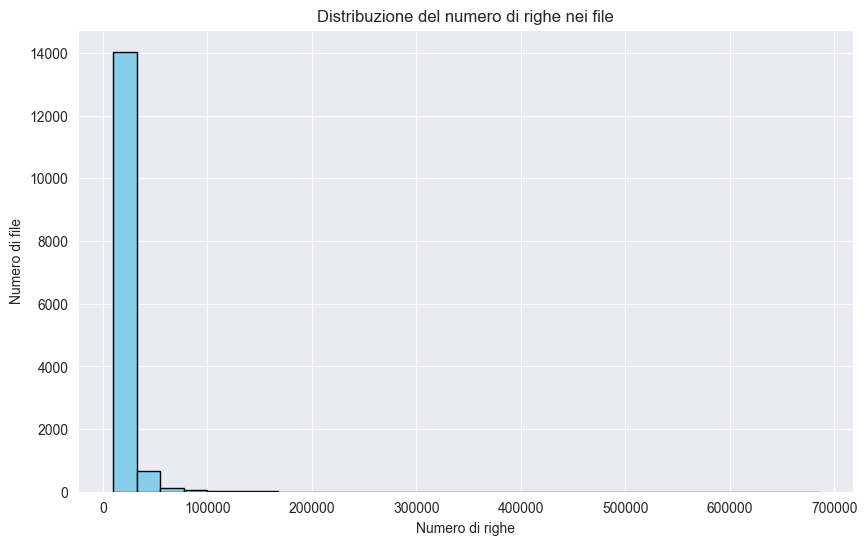

In [17]:
import os
import pandas as pd

eegs_folder = './dataset/train_eegs/'

data = []

for filename in os.listdir(parquet_folder):

    df = pd.read_parquet(os.path.join(eegs_folder, filename))
    num_rows, num_columns = df.shape
    data.append({'File': filename, 'Numero di righe': num_rows, 'Numero di colonne': num_columns})

df_stats = pd.DataFrame(data)

print("Statistiche sul numero di righe e colonne:")
print(df_stats.describe())

plt.figure(figsize=(10, 6))
plt.hist(df_stats['Numero di righe'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuzione del numero di righe nei file')
plt.xlabel('Numero di righe')
plt.ylabel('Numero di file')
plt.grid(True)

plt.show()

# Split dataset

In [34]:
#70%/15%/15%
import numpy as np

# Load dataset
data = pd.read_csv('./hms-harmful-brain-activity-classification/dataset/dataset.csv')

# Shuffle dataset
data = data.sample(frac=1, random_state=42)

# Compute split indices
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

# split
train, valid, test = np.split(data, [train_size, train_size + val_size])

print("Dimensione Train:", len(train))
print("Dimensione Validation:", len(valid))
print("Dimensione Test:", len(test))

# Save CSV files
train.to_csv("./hms-harmful-brain-activity-classification/dataset/train.csv", index=False)
valid.to_csv("./hms-harmful-brain-activity-classification/dataset/validation.csv", index=False)
test.to_csv("./hms-harmful-brain-activity-classification/dataset/test.csv", index=False)

print("File CSV salvati correttamente!")


C:\Users\marti\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Dimensione Train: 74760
Dimensione Validation: 16020
Dimensione Test: 16020
File CSV salvati correttamente!


## Split EEGs and spectrograms

In [4]:
import os
import pandas as pd
import shutil

data_dir = "./hms-harmful-brain-activity-classification/dataset"

# Definizione delle cartelle di input e output
input_eeg_dir = data_dir + "/eegs"
input_spectrogram_dir = data_dir + "/spectrograms"
output_train_eeg_dir = data_dir + "/train_eegs"
output_val_eeg_dir = data_dir + "/val_eegs"
output_test_eeg_dir = data_dir + "/test_eegs"
output_train_spectrogram_dir = data_dir + "/train_spectrograms"
output_val_spectrogram_dir = data_dir + "/val_spectrograms"
output_test_spectrogram_dir = data_dir + "/test_spectrograms"

# Creazione delle cartelle di output se non esistono già
for dir_path in [output_train_eeg_dir, output_val_eeg_dir, output_test_eeg_dir,
                  output_train_spectrogram_dir, output_val_spectrogram_dir, output_test_spectrogram_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Caricamento dei file CSV
train_df = pd.read_csv(data_dir + "/train.csv")
val_df = pd.read_csv(data_dir + "/validation.csv")
test_df = pd.read_csv(data_dir + "/test.csv")

# Funzione per copiare i file .parquet
def copy_files(df, eeg_input_dir, spectrogram_input_dir, eeg_output_dir, spectrogram_output_dir):
    for index, row in df.iterrows():
        eeg_id = row["eeg_id"]
        spectrogram_id = row["spectrogram_id"]
        eeg_file = os.path.join(eeg_input_dir, f"{eeg_id}.parquet")
        spectrogram_file = os.path.join(spectrogram_input_dir, f"{spectrogram_id}.parquet")
        shutil.copy(eeg_file, eeg_output_dir)
        shutil.copy(spectrogram_file, spectrogram_output_dir)

# Copia dei file per il set di addestramento
copy_files(train_df, input_eeg_dir, input_spectrogram_dir, output_train_eeg_dir, output_train_spectrogram_dir)

# Copia dei file per il set di convalida
copy_files(val_df, input_eeg_dir, input_spectrogram_dir, output_val_eeg_dir, output_val_spectrogram_dir)

# Copia dei file per il set di test
copy_files(test_df, input_eeg_dir, input_spectrogram_dir, output_test_eeg_dir, output_test_spectrogram_dir)

print("File copiati correttamente!")


File copiati correttamente!


In [5]:
# Numero di valori unici per ciascuna colonna senza duplicati
train_unique_eeg_ids = train_df["eeg_id"].nunique()
train_unique_spectrogram_ids = train_df["spectrogram_id"].nunique()

val_unique_eeg_ids = val_df["eeg_id"].nunique()
val_unique_spectrogram_ids = val_df["spectrogram_id"].nunique()

test_unique_eeg_ids = test_df["eeg_id"].nunique()
test_unique_spectrogram_ids = test_df["spectrogram_id"].nunique()

# Stampare i risultati
print("Numero di valori unici di eeg_id e spectrogram_id nel file train.csv:")
print("eeg_id:", train_unique_eeg_ids)
print("spectrogram_id:", train_unique_spectrogram_ids)
print()

print("Numero di valori unici di eeg_id e spectrogram_id nel file val.csv:")
print("eeg_id:", val_unique_eeg_ids)
print("spectrogram_id:", val_unique_spectrogram_ids)
print()

print("Numero di valori unici di eeg_id e spectrogram_id nel file test.csv:")
print("eeg_id:", test_unique_eeg_ids)
print("spectrogram_id:", test_unique_spectrogram_ids)


Numero di valori unici di eeg_id e spectrogram_id nel file train.csv:
eeg_id: 14931
spectrogram_id: 10248

Numero di valori unici di eeg_id e spectrogram_id nel file val.csv:
eeg_id: 7354
spectrogram_id: 5863

Numero di valori unici di eeg_id e spectrogram_id nel file test.csv:
eeg_id: 7294
spectrogram_id: 5892


In [7]:
# Concatenazione dei dataframe per ottenere un unico dataframe
all_df = pd.concat([train_df, val_df, test_df])

# Numero totale di valori unici per ciascuna colonna senza duplicati
total_unique_eeg_ids = all_df["eeg_id"].nunique()
total_unique_spectrogram_ids = all_df["spectrogram_id"].nunique()

# Stampare i risultati
print("Numero totale di valori unici di eeg_id e spectrogram_id in tutti i file:")
print("eeg_id:", total_unique_eeg_ids)
print("spectrogram_id:", total_unique_spectrogram_ids)

Numero totale di valori unici di eeg_id e spectrogram_id in tutti i file:
eeg_id: 17089
spectrogram_id: 11138


# EEGs preprocessing

In [ ]:
import os
import pandas as pd
import shutil

data_dir = "./dataset"

# Definizione delle cartelle di input e output
output_train_eeg_dir = data_dir + "/train_eegs"
output_val_eeg_dir = data_dir + "/val_eegs"
output_test_eeg_dir = data_dir + "/test_eegs"

# Creazione delle cartelle di output se non esistono già
for dir_path in [output_train_eeg_dir, output_val_eeg_dir, output_test_eeg_dir,
                  output_train_spectrogram_dir, output_val_spectrogram_dir, output_test_spectrogram_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Caricamento dei file CSV
train_df = pd.read_csv(data_dir + "/train.csv")
val_df = pd.read_csv(data_dir + "/validation.csv")
test_df = pd.read_csv(data_dir + "/test.csv")

# Funzione per copiare i file .parquet
def copy_files(df, eeg_input_dir, spectrogram_input_dir, eeg_output_dir, spectrogram_output_dir):
    for index, row in df.iterrows():
        eeg_id = row["eeg_id"]
        spectrogram_id = row["spectrogram_id"]
        eeg_file = os.path.join(eeg_input_dir, f"{eeg_id}.parquet")
        spectrogram_file = os.path.join(spectrogram_input_dir, f"{spectrogram_id}.parquet")
        shutil.copy(eeg_file, eeg_output_dir)
        shutil.copy(spectrogram_file, spectrogram_output_dir)

# Copia dei file per il set di addestramento
copy_files(train_df, input_eeg_dir, input_spectrogram_dir, output_train_eeg_dir, output_train_spectrogram_dir)

# Copia dei file per il set di convalida
copy_files(val_df, input_eeg_dir, input_spectrogram_dir, output_val_eeg_dir, output_val_spectrogram_dir)

# Copia dei file per il set di test
copy_files(test_df, input_eeg_dir, input_spectrogram_dir, output_test_eeg_dir, output_test_spectrogram_dir)

print("File copiati correttamente!")
